<a href="https://colab.research.google.com/github/20104047TranThiMyNgoc/AI-Subject/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_flower=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_flower.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dulieu/Flower/train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')
validation=train_flower.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dulieu/Flower/validation',
                                          target_size=(150,150), batch_size=32, class_mode='categorical')

Found 369 images belonging to 5 classes.
Found 75 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(training_set.class_indices,validation.class_indices)

{'bougainvilea': 0, 'daisies': 1, 'gadenias': 2, 'hibiscus': 3, 'roses': 4} {'bougainvilea': 0, 'daisies': 1, 'gadenias': 2, 'hibiscus': 3, 'roses': 4}


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(training_set, epochs=100, batch_size=128)

Epoch 1/100
12/12 [==============================] - 226s 18s/step - loss: 2.7226 - accuracy: 0.2927
Epoch 2/100
12/12 [==============================] - 14s 1s/step - loss: 1.4036 - accuracy: 0.3930
Epoch 3/100
12/12 [==============================] - 14s 1s/step - loss: 1.0895 - accuracy: 0.5285
Epoch 4/100
12/12 [==============================] - 14s 1s/step - loss: 0.9486 - accuracy: 0.5854
Epoch 5/100
12/12 [==============================] - 14s 1s/step - loss: 0.7812 - accuracy: 0.7127
Epoch 6/100
12/12 [==============================] - 14s 1s/step - loss: 1.0075 - accuracy: 0.6748
Epoch 7/100
12/12 [==============================] - 13s 1s/step - loss: 0.6415 - accuracy: 0.7615
Epoch 8/100
12/12 [==============================] - 14s 1s/step - loss: 0.6642 - accuracy: 0.7507
Epoch 9/100
12/12 [==============================] - 13s 1s/step - loss: 0.6831 - accuracy: 0.7371
Epoch 10/100
12/12 [==============================] - 14s 1s/step - loss: 0.5882 - accuracy: 0.7751
Epoch 1

In [ ]:
model.save('Flower.h5')

In [ ]:
model_flower=load_model('Flower.h5')

1/1 [==============================] - 0s 65ms/step
[[9.9994636e-01 4.2444490e-18 1.5949622e-15 1.9633649e-07 5.3417352e-05]]
1/1 [==============================] - 0s 15ms/step
Đây là: bougainvilea


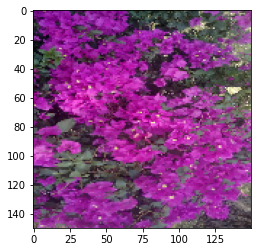

1/1 [==============================] - 0s 16ms/step
[[4.3204685e-12 9.9999678e-01 2.4145043e-06 2.2469374e-13 8.7443374e-07]]
1/1 [==============================] - 0s 15ms/step
Đây là: daisies


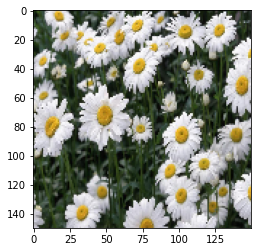

1/1 [==============================] - 0s 15ms/step
[[2.3309836e-23 1.0000000e+00 1.3692863e-14 2.2663339e-10 3.0529957e-11]]
1/1 [==============================] - 0s 16ms/step
Đây là: daisies


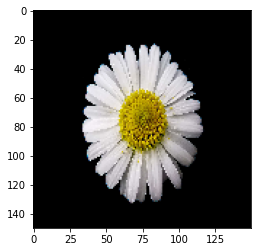

1/1 [==============================] - 0s 14ms/step
[[2.7020139e-06 2.4943872e-10 1.9528942e-15 1.8465899e-07 9.9999714e-01]]
1/1 [==============================] - 0s 16ms/step
Đây là: roses


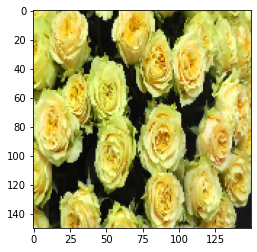

1/1 [==============================] - 0s 14ms/step
[[1.0538290e-13 8.0639156e-21 4.5386966e-34 1.0000000e+00 5.9860972e-16]]
1/1 [==============================] - 0s 15ms/step
Đây là: hibiscus


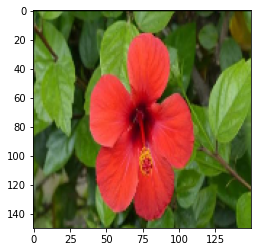

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/dulieu/Flower/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_flower.predict(img)
  class_name=['bougainvilea','daisies','gadenias','hibiscus','roses']
  print(model.predict(img))
  a= int(np.argmax(model.predict(img),axis=1))
  print("Đây là:", class_name[a])
  plt.show()


In [ ]:
! jupyter nbconvert --to html /content/Flower.ipynb

[NbConvertApp] WARNING | pattern '/content/Flower.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute